In [29]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import pandas as pd
import numpy as np
import random
import torch
import transformers
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
doordash_train = pd.read_csv("../local/data/doordash/all_train.csv")
doordash_test = pd.read_csv("../local/data/doordash/all_test.csv")
doordash_all = pd.concat([doordash_train, doordash_test], ignore_index=True)

doordash_test

,Business,Name,L1,L2,Image URL,L1 ID,L2 ID,Image Name
0,HyVee,saint brendan's irish cream liqueur,Alcohol,Liquor,https://fa74d61d848a20b729bb-0251b36b713060ab3...,alcohol,liquor,46892593.jpeg
1,Walgreens,festive voice waterglobe (1 ct),Household,Decorations,http://cdn.doordash.com/media/photos/1747db84-...,household,decorations,59249357.jpeg
2,Fresh Thyme,aura cacia eucalyptus 100% pure essential oil ...,Vitamins,Aromatherapy,http://cdn.doordash.com/media/photos/5fa5efc5-...,vitamins,aromatherapy,65693796.jpeg
3,Walgreens,hollywood beauty coconut oil (2 oz),Personal Care,Hair Care,http://cdn.doordash.com/media/photos/dadc4cfb-...,personal_care,hair_care,91619698.jpeg
4,Cub Foods,jell-o cherry gelatin dessert (6 oz),Pantry,Baking Mixes,http://cdn.doordash.com/media/photos/494c95d9-...,pantry,baking_mixes,3535125.jpeg
...,...,...,...,...,...,...,...,...
17090,Smart & Final,bar s sliced bacon (12 oz),Meat & Fish,Bacon,http://cdn.doordash.com/media/photos/f6fc0dda-...,meat_and_fish,bacon,49092778.jpeg
17091,Walgreens,sharpie marker retractable fine point fine (2 ct),Household,Office Supplies,http://cdn.doordash.com/media/photos/e6fcd965-...,household,office_supplies,19984289.jpeg
17092,Fresh Thyme,endangered species bar oat mlk dk chocolate rc...,Snacks,Protein & Meal Bars,http://cdn.doordash.com/media/photos/97043cfd-...,snacks,protein_and_meal_bars,81544706.jpeg
17093,Smart & Final US,"maries, dressing, poppy seed",Pantry,Dressing,https://i.mctimg.com/file/4a88ee99b60bf00119e3...,pantry,dressing,64042401.jpeg


In [32]:
google_train = pd.read_csv("../local/data/google/all_train.csv")
google_test = pd.read_csv("../local/data/google/all_test.csv")
google_all = pd.concat([google_train, google_test], ignore_index=True)

google_all

,Business,Name,L1,L2,L1 ID,L2 ID
0,Walmart - Beauty Encounter,Wella - Eimi Ocean Spritz 5.07 oz,Personal Care,Hair Care,personal_care,hair_care
1,eBay - hnh-overstock,Healthy Breeds 840235175322 Lakeland Terrier E...,Pet Care,Pet Accessories,pet_care,pet_accessories
2,WholesalePartySupplies,"Spirit Riding Free Tattoos, 24ct",Personal Care,Makeup,personal_care,makeup
3,betterluckstore.com,Smart for Life Low Sugar Protein Bar Luscious ...,Snacks,Protein & Meal Bars,snacks,protein_and_meal_bars
4,Chewy.com,"Exo-Terra Forest Bark, 8 qt",Pet Care,Pet Accessories,pet_care,pet_accessories
...,...,...,...,...,...,...
199722,eBay - beulahscandyland,Kerry Christmas Sanding Sugar Blend Red Green ...,Pantry,Sweet Toppings,pantry,sweet_toppings
199723,eBay - igourmet,"Fischer & Wieser Chipotle Sauce, Pomegranate &...",Pantry,Sauces,pantry,sauces
199724,Joybuy Cross Border,Outtop Coral Velvet Broom Cover Cloth Absorben...,Household,Cleaning,household,cleaning
199725,1-800-PetMeds,"Resultix Tick Spray, 20 ml",Pet Care,Pet Accessories,pet_care,pet_accessories


In [33]:
instacart_train = pd.read_csv("../local/data/instacart/all_train.csv")
instacart_test = pd.read_csv("../local/data/instacart/all_test.csv")
instacart_all = pd.concat([instacart_train, instacart_test], ignore_index=True)

instacart_all

,Business,Name,L1,L2,L1 ID,L2 ID
0,Super 1 Foods,Hallmark Gift Bow Black (1 ct),Household,Clothing,household,clothing
1,Gitto Farmers Market,B&G Sweet Mixed Pickles (16 fl oz),Pantry,Pickles,pantry,pickles
2,Bi-Rite Market,Tom's of Maine Soft Toothbrush (1 ct),Personal Care,Oral Health,personal_care,oral_health
3,Schnucks,No nonsense Shaping Great Shapes Tights Opaque...,Household,Clothing,household,clothing
4,Costco,Chicken of the Sea Albacore Solid White in Wat...,Pantry,Canned Meat,pantry,canned_meat
...,...,...,...,...,...,...
20794,Erewhon,Righteously Raw Macaroon (3.2 oz),Frozen,Pies & Cakes,frozen,pies_and_cakes
20795,Kings Food Markets,Lamonica's Sliced Conch (29 oz),Meat & Fish,Shellfish,meat_and_fish,shellfish
20796,Morton Williams Wine & Spirits,Firefly Sweet Tea Lemonade (50 ml),Drinks,Tea,drinks,tea
20797,The Epicurean Trader,Ortiz El Velero Anchovies in Olive Oil (3.3 oz),Pantry,Canned Meat,pantry,canned_meat


## L1 class frequencies

By Percentage Frequency

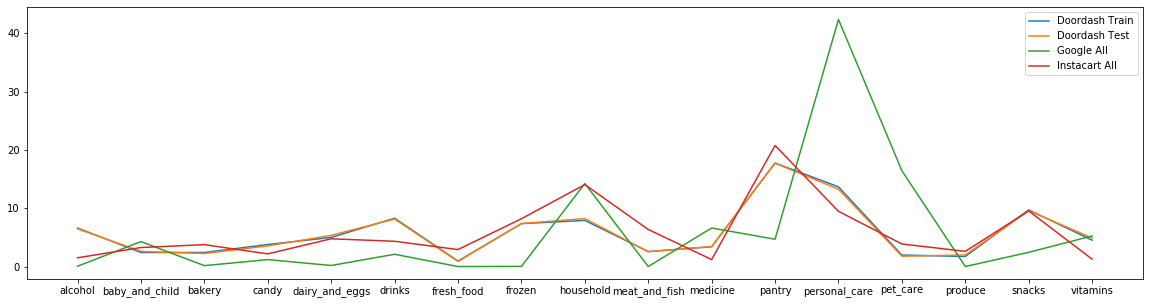

In [34]:
counts = pd.DataFrame({
    "Doordash Train": doordash_train["L1 ID"].value_counts() * 100 / len(doordash_train),
    "Doordash Test": doordash_test["L1 ID"].value_counts() * 100 / len(doordash_test),
    "Google All": google_all["L1 ID"].value_counts() * 100 / len(google_all),
    "Instacart All": instacart_all["L1 ID"].value_counts() * 100 / len(instacart_all)
})

plot = counts.plot(y=["Doordash Train", "Doordash Test", "Google All", "Instacart All"], figsize=(20, 5))
plot.set_xticks(range(len(counts)))
plot.set_xticklabels(list(counts.index))
plot

Absolute number of samples

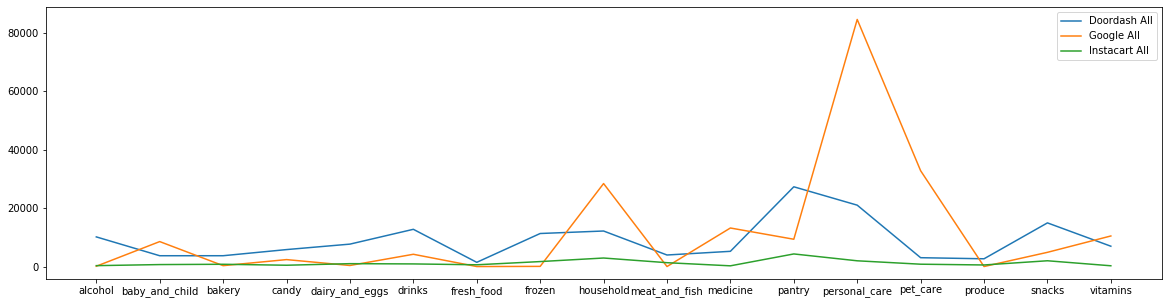

In [35]:
counts = pd.DataFrame({
    "Doordash All": doordash_train["L1 ID"].value_counts(),
    "Google All": google_all["L1 ID"].value_counts(),
    "Instacart All": instacart_all["L1 ID"].value_counts()
})

plot = counts.plot(y=["Doordash All", "Google All", "Instacart All"], figsize=(20, 5))
plot.set_xticks(range(len(counts)))
plot.set_xticklabels(list(counts.index))
plot

## L2 Class Frequencies

In [36]:
scraped = pd.DataFrame({    
    "Google All": google_all.groupby(["L1 ID", "L2 ID"]).size().replace('NaN', 0),
    "Instacart All": instacart_all.groupby(["L1 ID", "L2 ID"]).size().replace('NaN', 0)
})

In [37]:
# samples per L2 class
class_data = pd.DataFrame({
    "Doordash Train": doordash_train.groupby(["L1 ID", "L2 ID"]).size(), 
    "Doordash Test": doordash_test.groupby(["L1 ID", "L2 ID"]).size(), 
    "Scraped": scraped.sum(axis=1, min_count=1),
})

pd.options.display.float_format = '{:,.0f}'.format

print(class_data.sort_values('Doordash Train', ascending=False).to_string())

pd.reset_option('^display.', silent=True)

                                      Doordash Train  Doordash Test  Scraped
L1 ID          L2 ID                                                        
personal_care  makeup                           5377            581   17,043
alcohol        wine                             4088            433       71
personal_care  hair_care                        3212            352   12,218
alcohol        beer                             3156            324       71
candy          chocolate                        3106            353      723
vitamins       supplements                      3016            366    9,396
frozen         meals                            2790            305      461
snacks         chips                            2704            315      436
drinks         juice                            2522            262      421
pantry         spices_and_seasoning             2167            229    1,565
               baking                           2147            244    1,150

## Predictions

For every L1 and L2 category, we need to extract two scores: (train doordash --> test doordash) and (train doordash + google --> test doordash)

In [38]:
doordash_accs = {}  # key = (l1, l2) value = acc
scraped_accs = {}  # key = (l1, l2) value = acc
hybrid_accs = {}  # key = (l1, l2) value = acc
hybrid_best_accs = {}  # key = (l1, l2) value = acc

In [39]:
# Given predictions, calculate the accuracy per sub-category
def get_accuracies(category_id, preds, accs_dict):
    scores = preds["Pred"] == preds["Category ID"]
    accs = scores.groupby(preds["Category ID"]).mean()
    
    for subcategory_id, acc in zip(list(accs.index), list(accs)):
        accs_dict[(category_id, subcategory_id)] = [acc]

In [40]:
import os

def eval_predictions(dir_path, accs_dict):
    # key = category id, value = data frame
    predictions = {}  

    for filename in os.listdir(dir_path):
        category_id = filename[:-4]  # strip .csv
        filepath = os.path.join(dir_path, filename)

        # store (category id, predictions)
        predictions[category_id] = pd.read_csv(filepath)

    for category_id, preds in predictions.items():
        get_accuracies(category_id, preds, accs_dict)
    
    return predictions

In [41]:
doordash_preds = eval_predictions("../local/preds/nlp-doordash", doordash_accs)
scraped_preds = eval_predictions("../local/preds/nlp-doordash-google-instacart", scraped_accs)
hybrid_preds = eval_predictions("../local/preds/hybrid-doordash", hybrid_accs)
hybrid_best_preds = eval_predictions("../local/preds/hybrid-best", hybrid_best_accs)

#### L1

In [42]:
supervised_l1_accs = []
scraped_l1_accs = []
hybrid_l1_accs = []
hybrid_best_l1_accs = []

for (l1, l2), [acc] in doordash_accs.items():
    if l1 == 'grocery':
        supervised_l1_accs.append((l2, acc))

for (l1, l2), [acc] in scraped_accs.items():
    if l1 == 'grocery':
        scraped_l1_accs.append((l2, acc))
        
for (l1, l2), [acc] in hybrid_accs.items():
    if l1 == 'grocery':
        hybrid_l1_accs.append((l2, acc))
        
for (l1, l2), [acc] in hybrid_best_accs.items():
    if l1 == 'grocery':
        hybrid_best_l1_accs.append((l2, acc))
        
l1_accs = pd.DataFrame({
    'Supervised Acc': pd.Series({k: v for k, v in supervised_l1_accs}),
    'Scraped Acc': pd.Series({k: v for k, v in scraped_l1_accs}),
    'Hybrid Acc': pd.Series({k: v for k, v in hybrid_l1_accs}),
    'Hybrid Best Acc': pd.Series({k: v for k, v in hybrid_best_l1_accs}),
    #'Supervised Data': counts["Doordash All"],
    #'Scraped Data': counts["Instacart All"] + counts["Google All"]
})

In [43]:
l1_accs

,Supervised Acc,Scraped Acc,Hybrid Acc,Hybrid Best Acc
alcohol,0.982805,0.968326,0.987805,0.985366
baby_and_child,0.842697,0.851685,0.866213,0.868481
bakery,0.869110,0.871728,0.870879,0.870879
candy,0.955372,0.952066,0.972789,0.972789
dairy_and_eggs,0.965027,0.948634,0.973034,0.973034
drinks,0.947595,0.956210,0.956329,0.959289
fresh_food,0.614865,0.581081,0.641379,0.668966
frozen,0.922284,0.919112,0.933603,0.939271
household,0.953802,0.963042,0.970023,0.968486
meat_and_fish,0.896313,0.838710,0.888889,0.876812


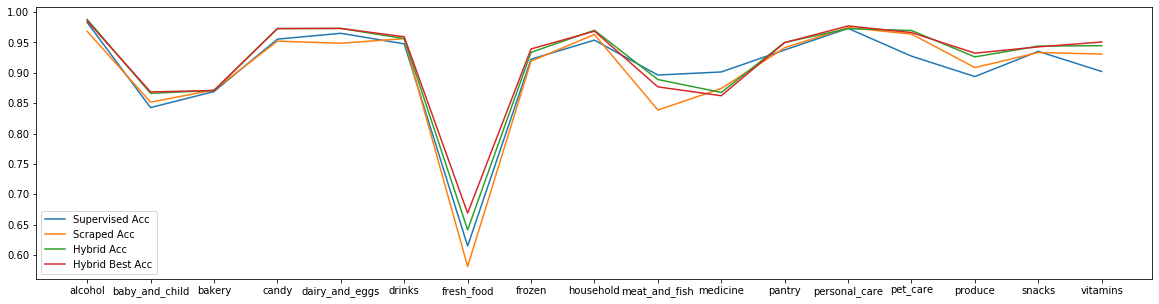

In [44]:
plot = l1_accs.plot(y=["Supervised Acc", "Scraped Acc", "Hybrid Acc", "Hybrid Best Acc"], figsize=(20, 5))
plot.set_xticks(range(len(l1_accs)))
plot.set_xticklabels(list(l1_accs.index))
plot

#### L2

In [45]:
weak_supervision_accuracies = pd.DataFrame(index=pd.MultiIndex.from_tuples(scraped_accs.keys()), columns=["Accuracy"])
supervised_accuracies = pd.DataFrame(index=pd.MultiIndex.from_tuples(doordash_accs.keys()), columns=["Accuracy"])
hybrid_accuracies = pd.DataFrame(index=pd.MultiIndex.from_tuples(hybrid_accs.keys()), columns=["Accuracy"])
hybrid_best_accuracies = pd.DataFrame(index=pd.MultiIndex.from_tuples(hybrid_best_accs.keys()), columns=["Accuracy"])

for (l1_id, l2_id), acc in scraped_accs.items():
    weak_supervision_accuracies.loc[l1_id, l2_id] = acc

for (l1_id, l2_id), acc in doordash_accs.items():
    supervised_accuracies.loc[l1_id, l2_id] = acc
    
for (l1_id, l2_id), acc in hybrid_accs.items():
    hybrid_accuracies.loc[l1_id, l2_id] = acc
    
for (l1_id, l2_id), acc in hybrid_best_accs.items():
    hybrid_best_accuracies.loc[l1_id, l2_id] = acc
    
weak_supervision_accuracies

Accuracy
pet_care cat_food             0.982759
         cat_toys_and_treats       0.4
         cat_treats             0.9375
         dog_food             0.938776
         dog_treats           0.694444
...                                ...
drinks   soda                 0.971698
         sparkling_water      0.974359
         sports               0.873786
         still_water          0.907895
         tea                  0.957143

[223 rows x 1 columns]

In [46]:
class_data["Weak Supervision Accuracy"] = weak_supervision_accuracies
class_data["Supervised Accuracy"] = supervised_accuracies
class_data["Hybrid Accuracy"] = hybrid_accuracies
class_data["Hybrid Best Accuracy"] = hybrid_best_accuracies
print(class_data.sort_values('Doordash Train', ascending=False).to_string())

                                      Doordash Train  Doordash Test  Scraped Weak Supervision Accuracy Supervised Accuracy Hybrid Accuracy Hybrid Best Accuracy
L1 ID          L2 ID                                                                                                                                           
personal_care  makeup                           5377          581.0  17043.0                  0.969019            0.972461        0.977625             0.981067
alcohol        wine                             4088          433.0     71.0                  0.979215            0.986143        0.980456             0.983713
personal_care  hair_care                        3212          352.0  12218.0                  0.957386            0.963068          0.9683             0.974063
alcohol        beer                             3156          324.0     71.0                  0.966049            0.953704        0.944186              0.95814
candy          chocolate                

In [47]:
# A view with L1's staying intact to quickly view groups.
print(class_data.sort_values(['L1 ID', 'Doordash Train'], ascending=False).to_string())

                                      Doordash Train  Doordash Test  Scraped Weak Supervision Accuracy Supervised Accuracy Hybrid Accuracy Hybrid Best Accuracy
L1 ID          L2 ID                                                                                                                                           
vitamins       supplements                      3016          366.0   9396.0                   0.89071            0.833333        0.853591             0.883978
               vitamins_a-z                     1188          139.0    583.0                  0.755396            0.798561        0.798561             0.820144
               multivitamins                     851           91.0    523.0                  0.813187            0.769231        0.744444             0.755556
               aromatherapy                      698           80.0    187.0                     0.925                0.95          0.9125               0.9125
               homeopathy_and_immune    

Confusion matrix for a given model

Predicted,aromatherapy,childrens_health,homeopathy_and_immune,minerals,multivitamins,supplements,vitamins_a-z,All
Actual,,,,,,,,
aromatherapy,73,0,2,0,0,3,2,80
childrens_health,0,28,4,0,5,5,1,43
homeopathy_and_immune,2,3,66,0,2,10,1,84
minerals,2,0,1,20,7,2,1,33
multivitamins,0,1,2,5,67,7,8,90
supplements,6,8,4,1,14,309,20,362
vitamins_a-z,0,1,2,1,6,18,111,139
All,83,41,81,27,101,354,144,831


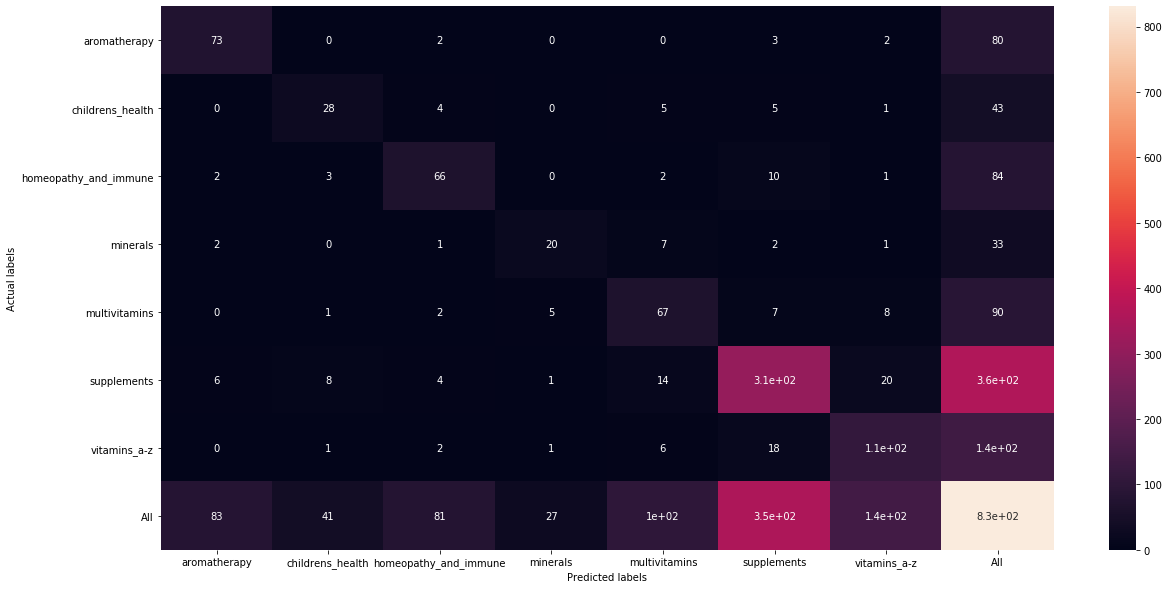

In [48]:
preds = hybrid_preds["vitamins"]

# generate confusion matrix
confusion_matrix = pd.crosstab(preds["Category ID"], preds["Pred"], margins=True)

# Set indexes to class names 
confusion_matrix.index.name = "Actual"
confusion_matrix.columns.name = "Predicted"

# Normalize confusion matrix 
#normalized_confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)

confusion_matrix

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(confusion_matrix, annot=True, ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 

confusion_matrix

#### Aggregate score per model

For each model, weight each class according to frequency in total doordash distribution. Then multiply class accuracies accordingly.

In [49]:
doordash_all = class_data[["Doordash Train", "Doordash Test"]].sum(axis=1, min_count=1)
doordash_all

L1 ID     L2 ID                
alcohol   alcohol-free                3.0
          beer                     3480.0
          liquor                   2291.0
          mixers                    251.0
          seltzer                   277.0
                                    ...  
vitamins  homeopathy_and_immune     757.0
          minerals                  299.0
          multivitamins             942.0
          supplements              3382.0
          vitamins_a-z             1327.0
Length: 209, dtype: float64

In [50]:
class_weights = pd.Series(index=doordash_all.index, dtype=float)
for l1, l2_df in doordash_all.groupby(level=0):
    class_weights[l1] = l2_df / l2_df.sum()

In [51]:
print(class_weights.to_string())

L1 ID           L2 ID                
alcohol         alcohol-free             0.000266
                beer                     0.309086
                liquor                   0.203482
                mixers                   0.022293
                seltzer                  0.024603
                spiked                   0.038725
                wine                     0.401545
baby_and_child  baby_food                0.274524
                bath_and_skin            0.107496
                diapers                  0.129670
                feeding                  0.093999
                formula                  0.066040
                health                   0.127501
                toddler_snacks           0.021451
                toys                     0.128465
                wipes                    0.050856
bakery          bagels                   0.069665
                bread                    0.258861
                break_and_bake           0.089709
            

In [52]:
weak_supervised_aggregate_scores = (class_weights * class_data["Weak Supervision Accuracy"]).groupby(level=0).sum()
supervised_aggregate_scores = (class_weights * class_data["Supervised Accuracy"]).groupby(level=0).sum()
hybrid_aggregate_scores = (class_weights * class_data["Hybrid Accuracy"]).groupby(level=0).sum()
hybrid_best_aggregate_scores = (class_weights * class_data["Hybrid Best Accuracy"]).groupby(level=0).sum()

In [53]:
aggregate_scores = pd.DataFrame({
    "Weak Supervised": weak_supervised_aggregate_scores,
    "Supervised": supervised_aggregate_scores,
    "Hybrid Weak Supervised": hybrid_aggregate_scores,
    "Hybrid Best": hybrid_best_aggregate_scores
})

aggregate_scores.sort_values(["Hybrid Best"], ascending=False)

,Weak Supervised,Supervised,Hybrid Weak Supervised,Hybrid Best
L1 ID,,,,
alcohol,0.952899,0.959373,0.958383,0.964579
personal_care,0.928795,0.932658,0.934654,0.941156
drinks,0.922686,0.918504,0.928606,0.930733
produce,0.905162,0.896308,0.919402,0.928311
bakery,0.909149,0.926579,0.936632,0.925247
medicine,0.902727,0.907978,0.918477,0.912253
candy,0.903741,0.907682,0.907415,0.907495
dairy_and_eggs,0.904195,0.906925,0.914529,0.906837
meat_and_fish,0.892853,0.888782,0.902560,0.898503
